In [204]:
# packacges
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 

# encoder 
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# model 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report 
from sklearn.linear_model import LogisticRegression


#suppress warning
import warnings
warnings.filterwarnings('ignore')


## 1. Dataset Onboarding

In [187]:
df = pd.read_csv("predictive_maintenance.csv")

In [95]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [96]:
df.shape

(10000, 10)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


## 2. Exploratory Data Analysis

In [188]:
# Drop unnecessary columns
# UDI is unique ID which is not needed as we already have product ID as the unique identifier
# 'Target' is also unnecessary as we will predct the Failure Type
df = df.drop(['UDI', 'Product ID', 'Target'], axis = 1)

In [100]:
# Univariate Analysis (Plotting)

In [189]:
# get the categorical and numerical features 
cat_features = df.select_dtypes(include=['object'])
num_features = df.select_dtypes(['float64', 'int64'])

In [206]:
def plot(feature, kind):
    plt.figure(figsize=(16, 10))
    if kind =='box' or kind == 'count':
        sns.catplot(x=feature, kind=kind, data=df, color='skyblue')
    elif kind =='hist':
        sns.histplot(data = df, x= feature, color='skyblue')
    
    plt.title(f"{feature} Count Plot")   
    plt.xlabel(f"{feature}")  
    plt.ylabel("Total Count")
    plt.xticks(rotation=45)
    if kind == 'count':
        ax = plt.gca()  # Get the current axis
        for p in ax.patches: 
            ax.annotate(format(p.get_height(), '.0f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 5), 
                        textcoords = 'offset points') 
    
    plt.show()

<Figure size 1600x1600 with 0 Axes>

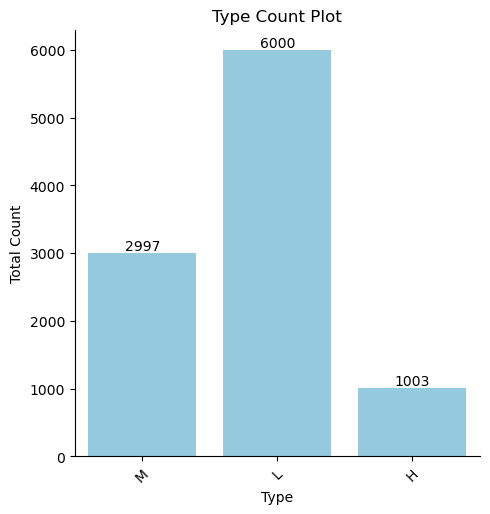

<Figure size 1600x1600 with 0 Axes>

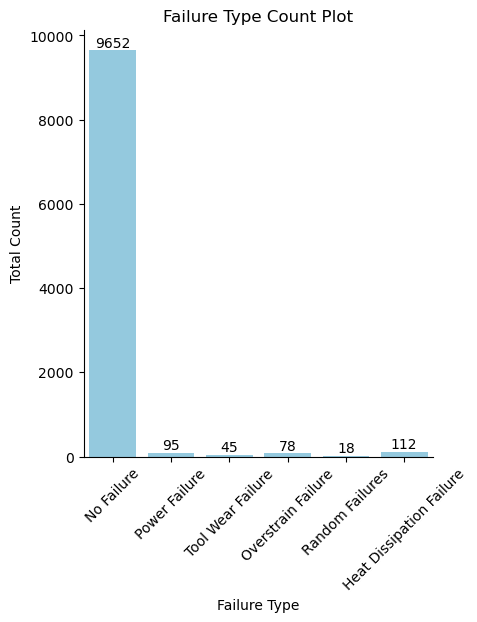

In [191]:
# Categorical Features Plot
for feature in cat_features.columns:
    plot(feature, 'count')

**Target feature (Failure Type) has imbalance issues**

<Figure size 1600x1600 with 0 Axes>

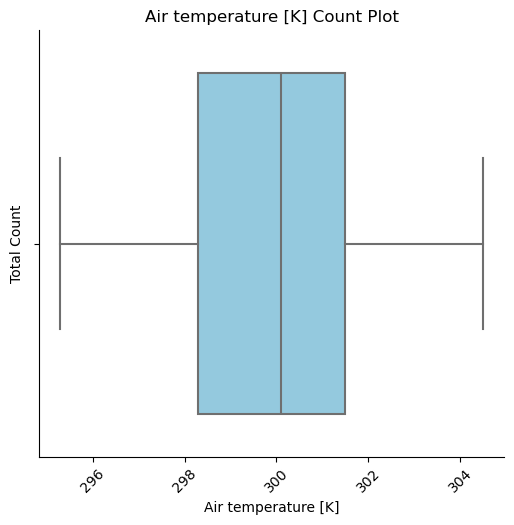

<Figure size 1600x1600 with 0 Axes>

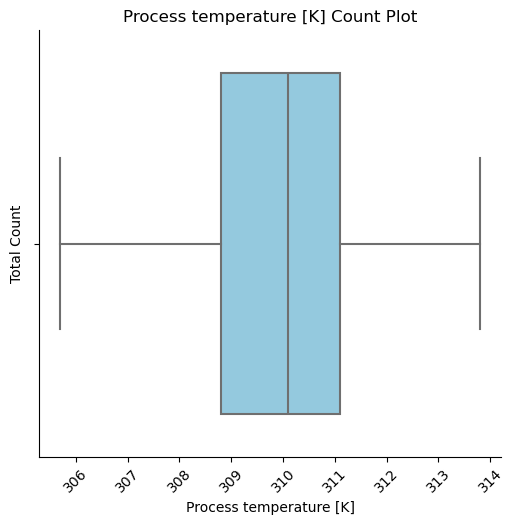

<Figure size 1600x1600 with 0 Axes>

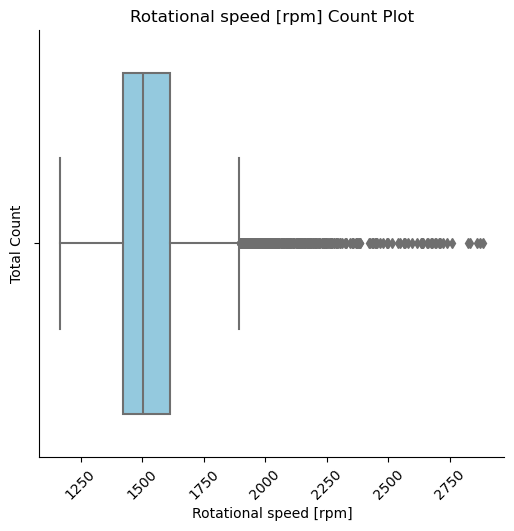

<Figure size 1600x1600 with 0 Axes>

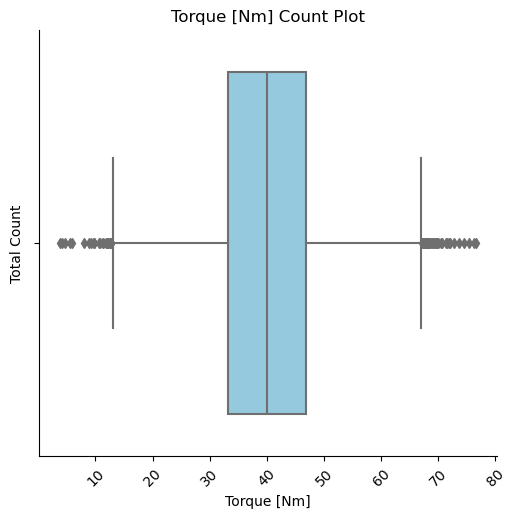

<Figure size 1600x1600 with 0 Axes>

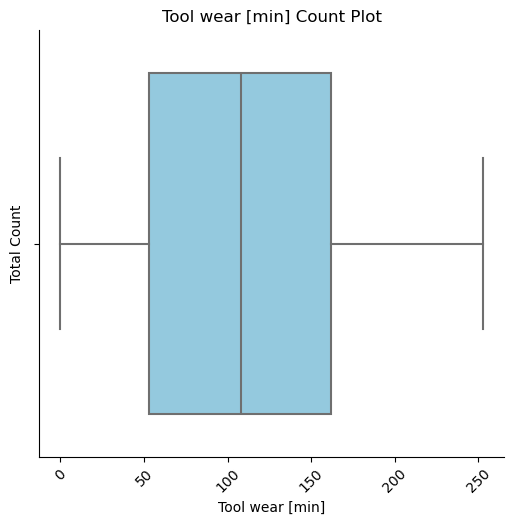

In [192]:
# Numerical Features BoxPlot 
for feature in num_features: 
    plot(feature, 'box')

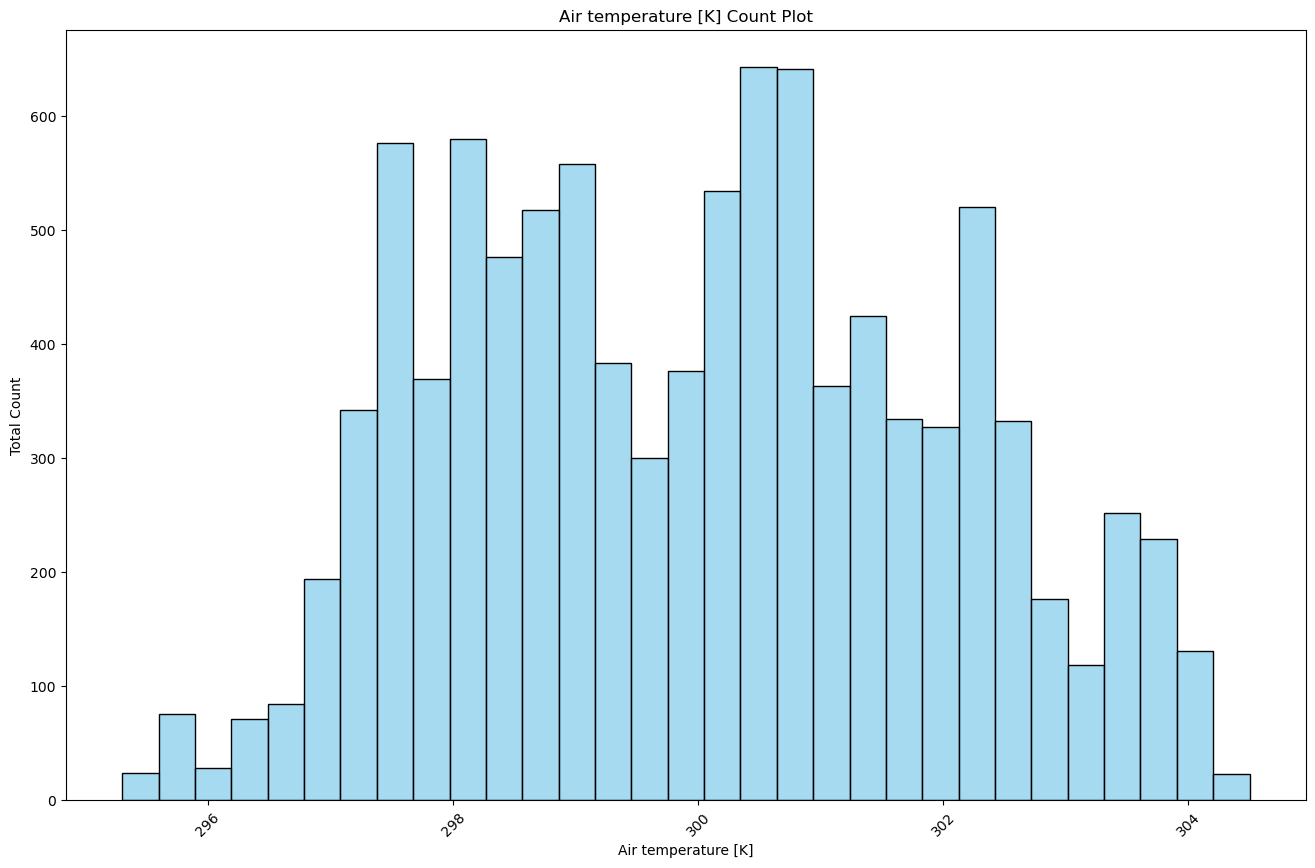

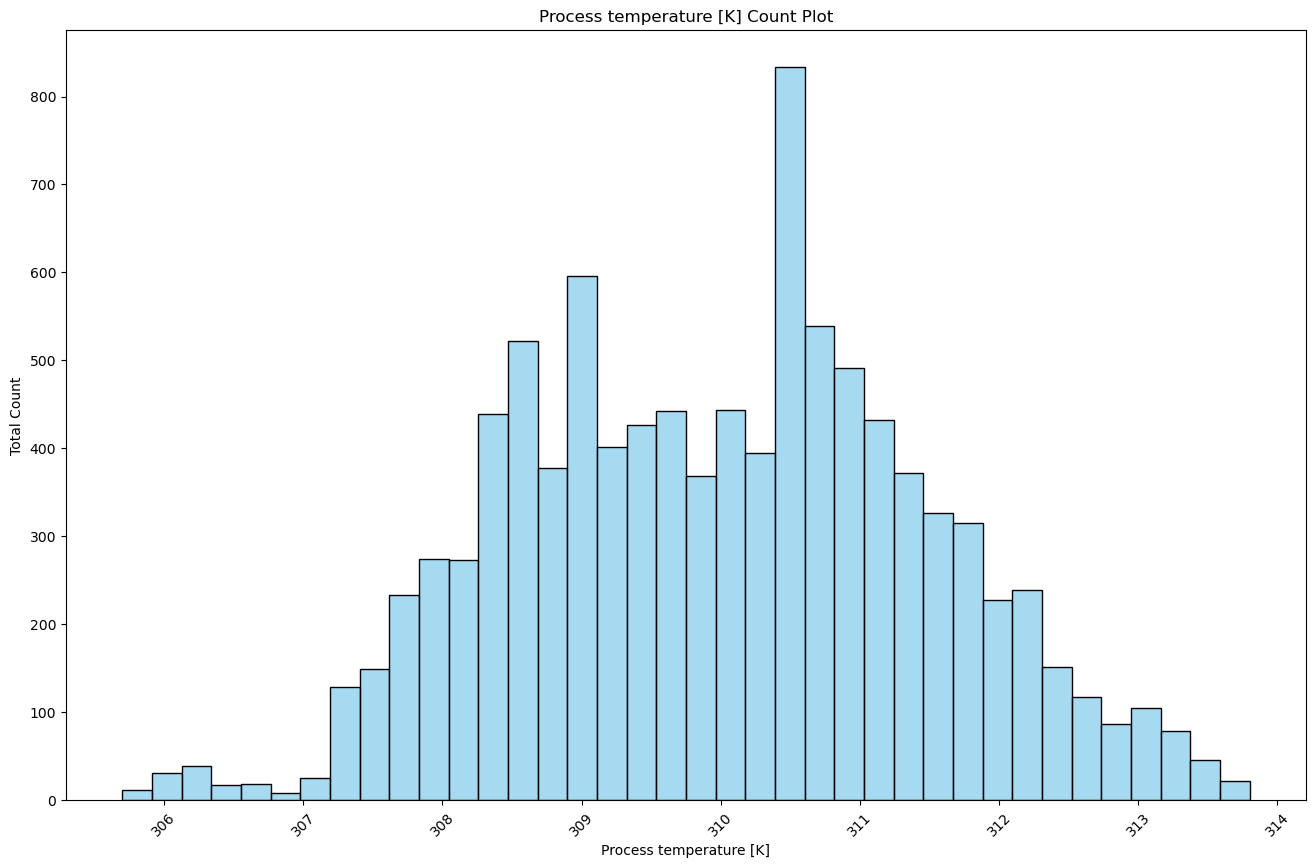

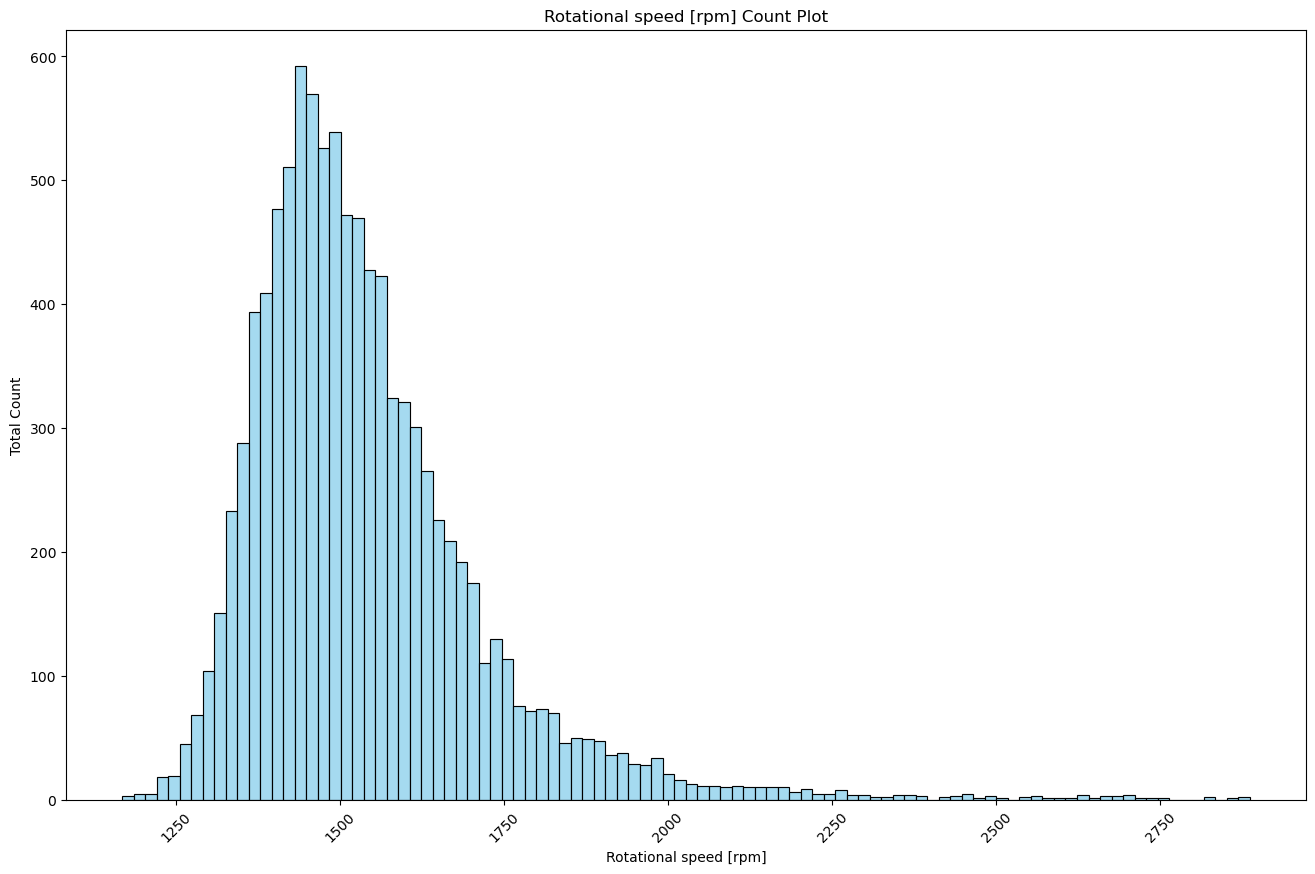

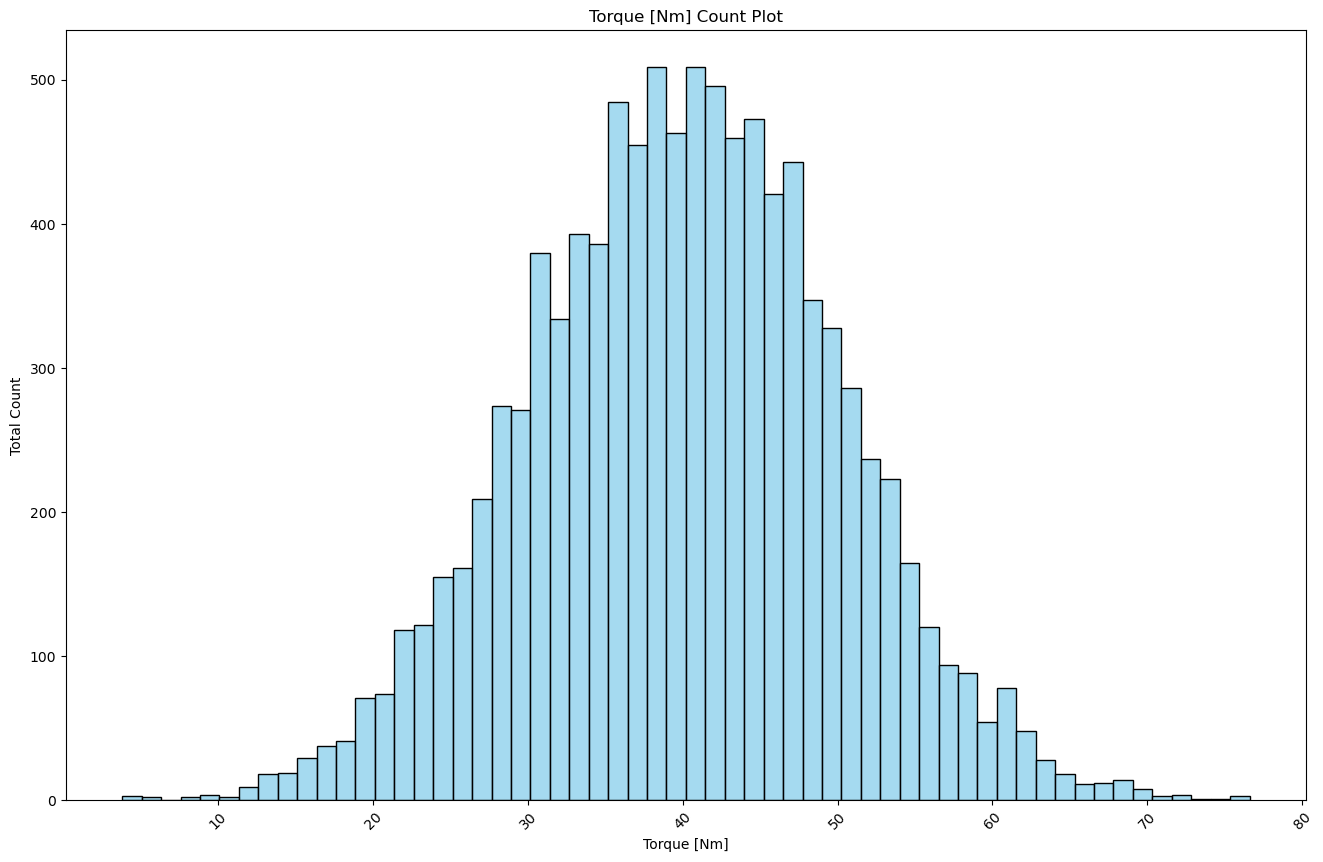

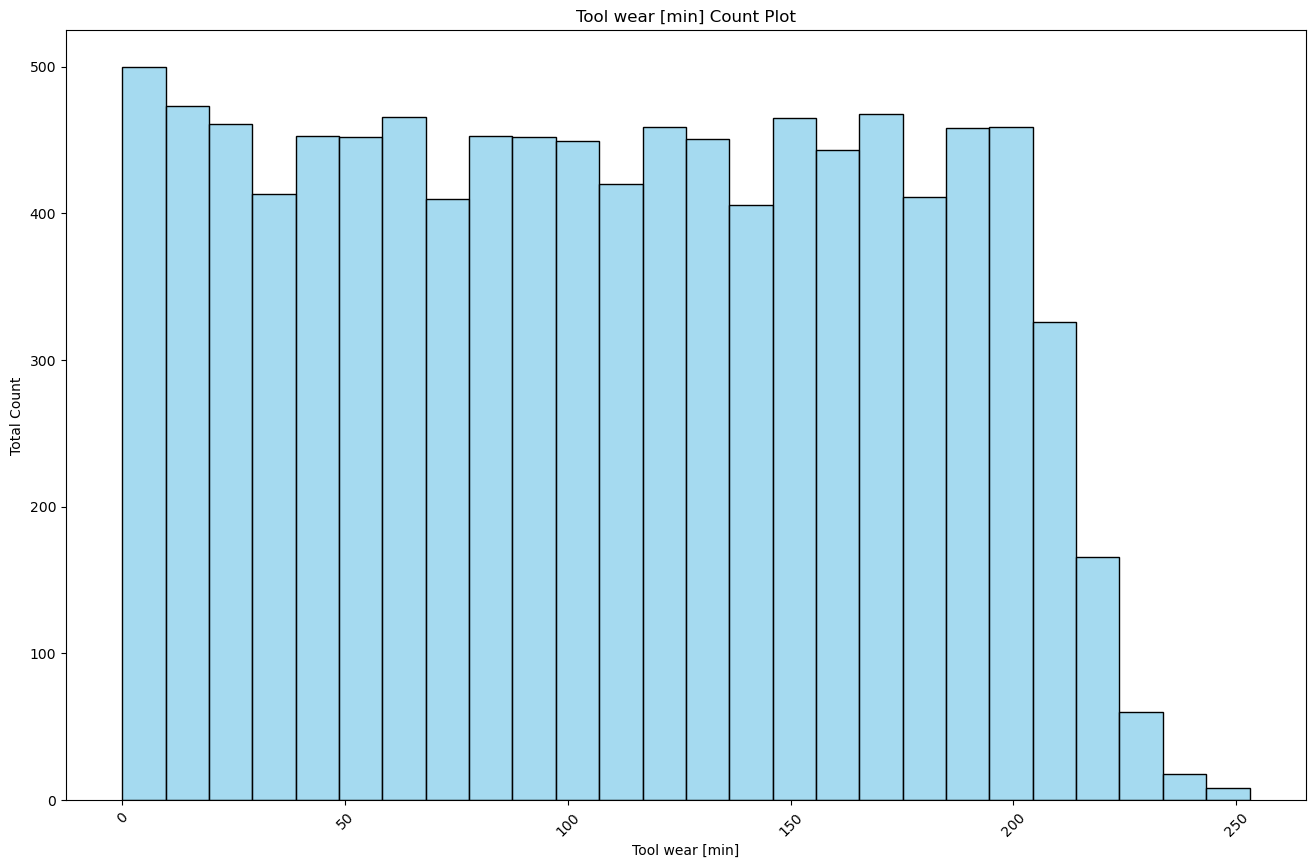

In [207]:
# Numerical Features histogram
for feature in num_features:
    plot(feature, 'hist')

In [105]:
# numeric descriptive analysis 
num_features.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


In [109]:
# Bivariate Analysis

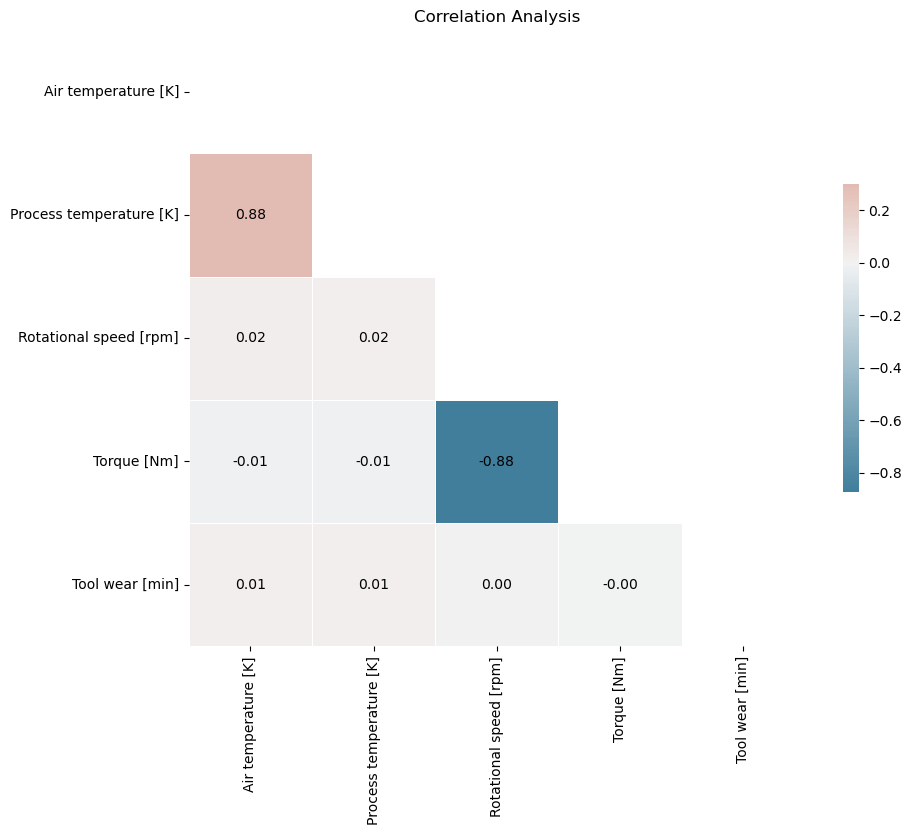

In [116]:
# Correation Analysis
corr = num_features.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5},
                )

# Annotate only the visible cells
for i in range(len(corr)):
    for j in range(len(corr)):
        if mask[i, j] == False:
            plt.text(j + 0.5, i + 0.5, f'{corr.iloc[i, j]:.2f}',
                     horizontalalignment='center',
                     verticalalignment='center',
                     fontsize=10, color='black')
plt.title('Correlation Analysis')
plt.show()



**Process Temperature (K) and Air Temperature features are highly correlated (0.88) also Torque and Rotational Speed are highly correlated. We may be able to remove one from each of these group as they possess high correlation**

In [130]:
def bivariate_plot(target_feature, x_feature):

    # Check if the x feature is categorical or numerical
    if df[x_feature].dtype == 'object':
        # Categorical x feature
        g = sns.catplot(x=x_feature, row=target_feature, kind='count', data=df, height=4, aspect=1.5)
        for ax in g.axes.flat:
            for p in ax.patches:
                ax.annotate(format(p.get_height(), '.0f'), 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha = 'center', va = 'center', 
                            xytext = (0, 5), 
                            textcoords = 'offset points')
    else:
        # Numerical x feature
        g = sns.catplot(x=target_feature, y=x_feature, data=df, kind='box', height=4, aspect=1.5)
        for ax in g.axes.flat:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    plt.show()

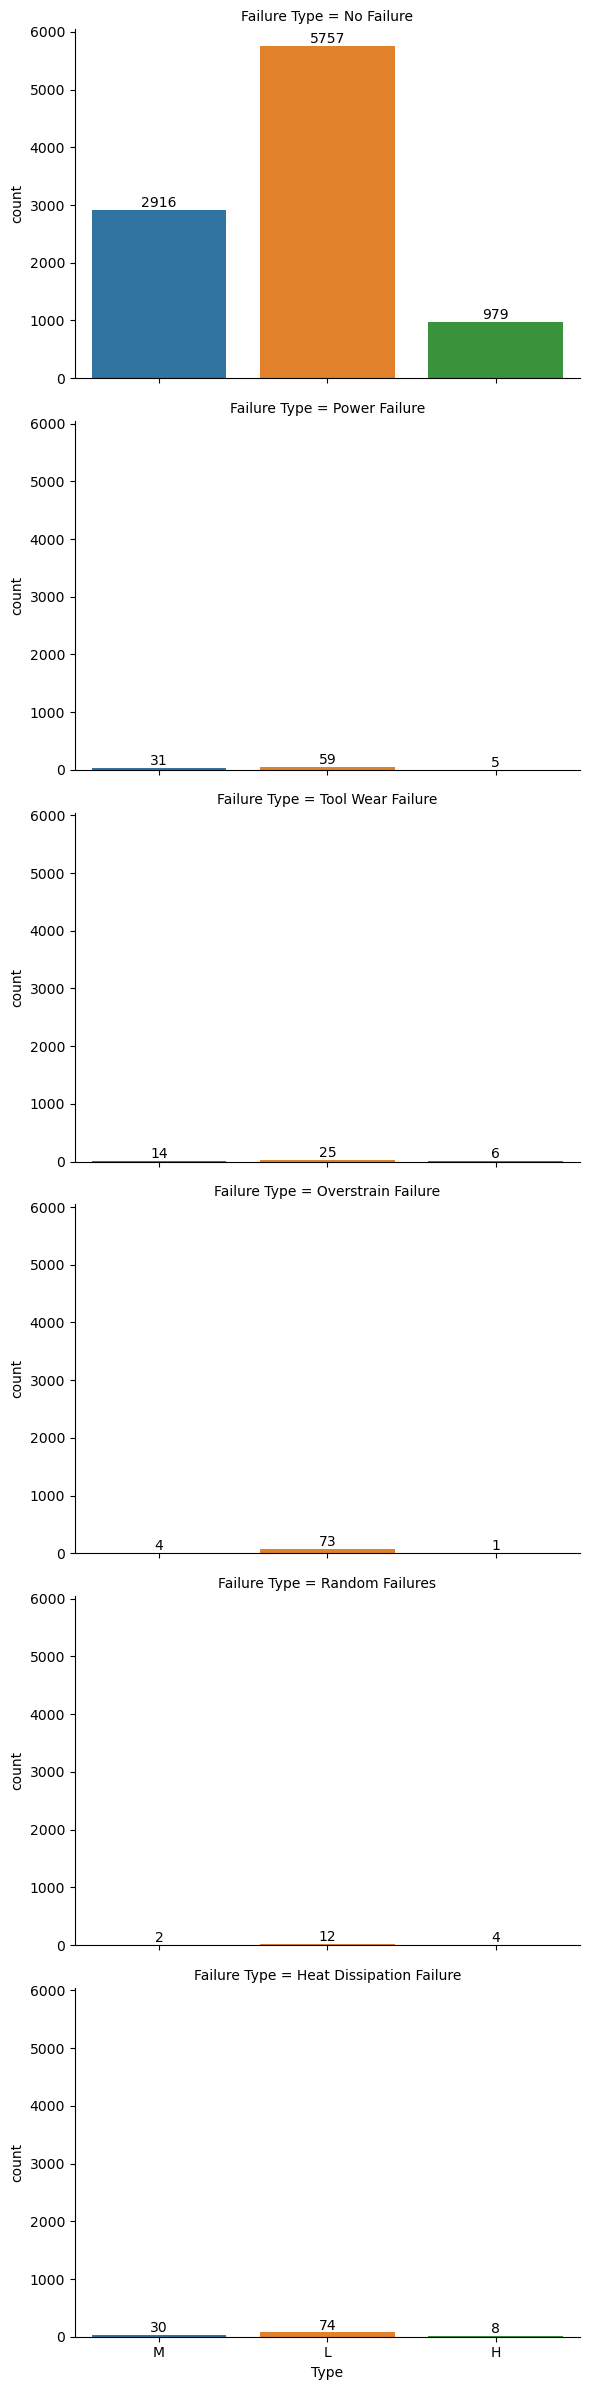

In [126]:
# Categorical BiVariate Plot
bivariate_plot('Failure Type', 'Type')

In [132]:
# Bivariate Plot for numeric features

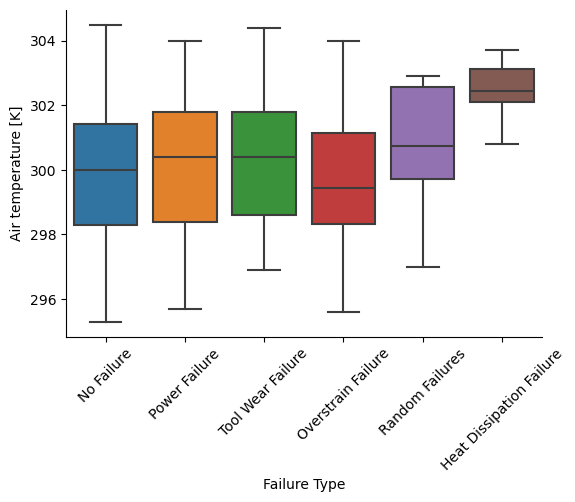

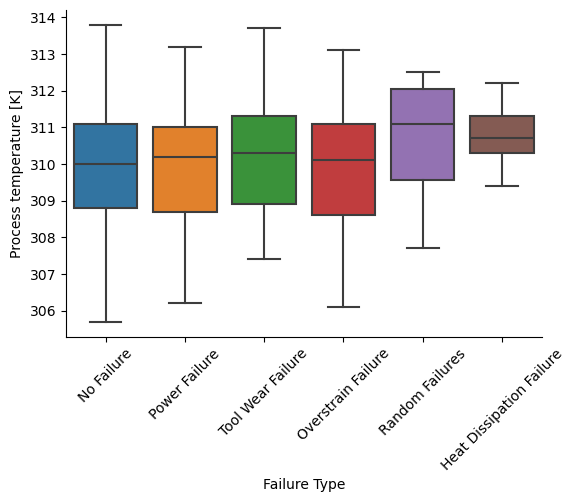

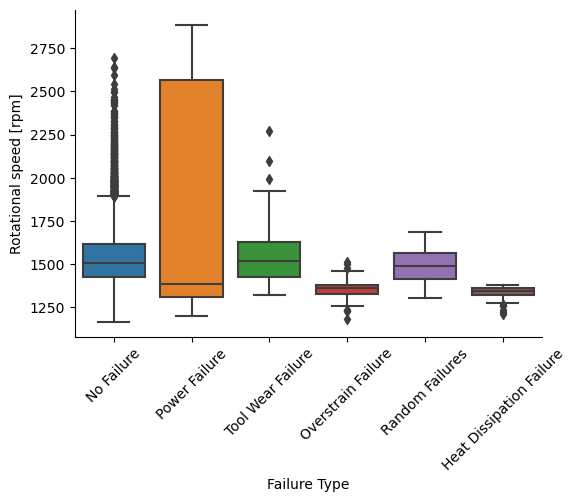

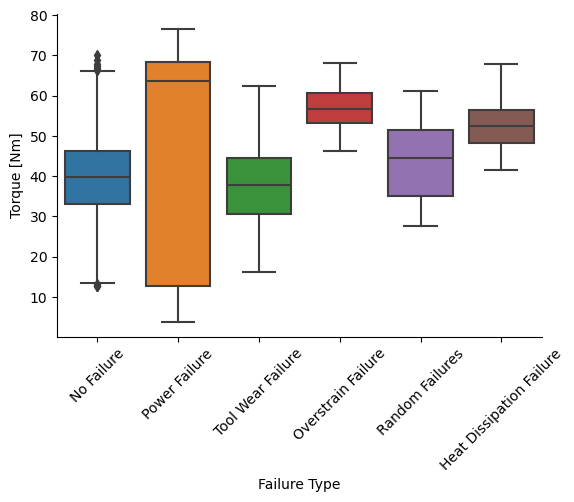

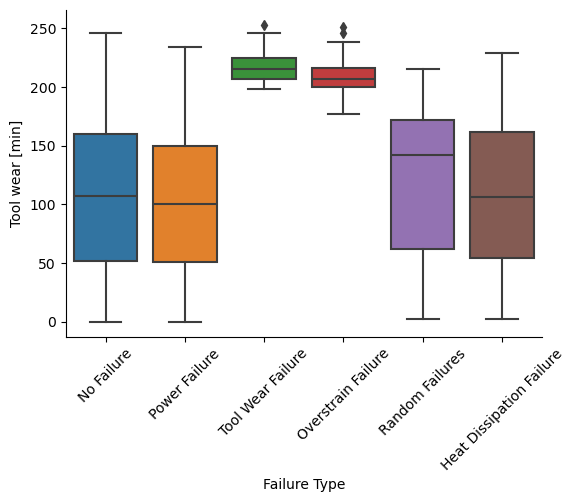

In [133]:
for feature in num_features:
    bivariate_plot('Failure Type', feature)

## 3. Data Preprocessing

In [183]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type Encoded,Failure Type Encoded
0,298.1,308.6,1551,42.8,0,2.0,1
1,298.2,308.7,1408,46.3,3,1.0,1
2,298.1,308.5,1498,49.4,5,1.0,1
3,298.2,308.6,1433,39.5,7,1.0,1
4,298.2,308.7,1408,40.0,9,1.0,1
...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,2.0,1
9996,298.9,308.4,1632,31.8,17,0.0,1
9997,299.0,308.6,1645,33.4,22,2.0,1
9998,299.0,308.7,1408,48.5,25,0.0,1


## 3. Encoding 

In [147]:
# Do ordinal encoding for type feature 
ordinal_encoder = OrdinalEncoder() 

In [157]:
encoded_column = ordinal_encoder.fit_transform(df['Type'].to_frame())

In [161]:
df['Type Encoded'] = encoded_column # add encoded type to dataframe 
df.drop('Type', axis = 1, inplace = True) # remove type feature

In [165]:
# Do label encoding for the target feature 
label_encoder = LabelEncoder()
encoded_target = label_encoder.fit_transform(df['Failure Type'])
df['Failure Type Encoded'] = encoded_target # add encoded target to dataframe 
df.drop('Failure Type', axis = 1, inplace = True) # remove target 

In [180]:
# Classes mapping show 

class_labels = label_encoder.classes_
numerical_labels = label_encoder.transform(class_labels)

mapping = dict(zip(class_labels, numerical_labels))


print("Mapping of original values to numerical labels:")
print()
for key, value in mapping.items():
    print(f"{key} -> {value}")

Mapping of original values to numerical labels:

Heat Dissipation Failure -> 0
No Failure -> 1
Overstrain Failure -> 2
Power Failure -> 3
Random Failures -> 4
Tool Wear Failure -> 5


In [166]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type Encoded,Failure Type Encoded
0,298.1,308.6,1551,42.8,0,2.0,1
1,298.2,308.7,1408,46.3,3,1.0,1
2,298.1,308.5,1498,49.4,5,1.0,1
3,298.2,308.6,1433,39.5,7,1.0,1
4,298.2,308.7,1408,40.0,9,1.0,1


## 3. Splitting Criteria

In [170]:


X = df.drop('Failure Type Encoded', axis =1)
y = df['Failure Type Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


In [171]:
X_train.shape

(6700, 6)

## 4. Model Building

In [174]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
predictions = lr_model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)

print('accuracy score: ', accuracy_score(y_test, predictions))
print('precision score: ', precision_score(y_test, predictions, average = 'weighted'))
print('recall score: ', recall_score(y_test, predictions, average = 'weighted'))
print('F1-score: ', f1_score(y_test, predictions, average = 'weighted'))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.97      1.00      0.98      3196
           2       0.47      0.31      0.38        29
           3       1.00      0.15      0.27        26
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00        12

    accuracy                           0.97      3300
   macro avg       0.41      0.24      0.27      3300
weighted avg       0.96      0.97      0.96      3300

Predicted labels:  [1 1 1 ... 1 1 1]
accuracy score:  0.9687878787878788
precision score:  0.9553439321488459
recall score:  0.9687878787878788
F1-score:  0.959350295296351


C:\Users\BS-670\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\BS-670\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\BS-670\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav